In [1]:
library(dplyr)
library(tidyverse)
library(ggplot2)



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


-- Attaching packages --------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.6     v stringr 1.4.0
v tidyr   1.1.4     v forcats 0.5.1
v readr   2.1.1     

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Installing package into 'C:/Users/RIK-PC/Documents/R/win-library/4.1'
(as 'lib' is unspecified)

also installing the dependencies 'matrixStats', 'RcppArmadillo', 'SparseM', 'MatrixModels', 'conquer', 'sp', 'minqa', 'nloptr', 'RcppEigen', 'carData', 'pbkrtest', 'quantreg', 'maptools', 'lme4', 'crosstalk', 'corrplot', 'viridis', 'car', 'DT', 'ellipse', 'flashClust', 'leaps', 'scatterplot3d', 'ggsci', 'cowplot', 'ggsignif', 'gr


  There is a binary version available but the source version is later:
        binary source needs_compilation
carData  3.0-4  3.0-5             FALSE



Warning message in download.file(url, destfile, method, mode = "wb", ...):
"downloaded length 3162112 != reported length 3844882"


package 'matrixStats' successfully unpacked and MD5 sums checked
package 'RcppArmadillo' successfully unpacked and MD5 sums checked
package 'SparseM' successfully unpacked and MD5 sums checked
package 'MatrixModels' successfully unpacked and MD5 sums checked
package 'conquer' successfully unpacked and MD5 sums checked
package 'sp' successfully unpacked and MD5 sums checked
package 'minqa' successfully unpacked and MD5 sums checked
package 'nloptr' successfully unpacked and MD5 sums checked
package 'RcppEigen' successfully unpacked and MD5 sums checked
package 'pbkrtest' successfully unpacked and MD5 sums checked
package 'quantreg' successfully unpacked and MD5 sums checked
package 'maptools' successfully unpacked and MD5 sums checked
package 'lme4' successfully unpacked and MD5 sums checked
package 'crosstalk' successfully unpacked and MD5 sums checked


Warning message in unzip(zipname, exdir = dest):
"error 1 in extracting from zip file"
Warning message in read.dcf(file.path(pkgname, "DESCRIPTION"), c("Package", "Type")):
"cannot open compressed file 'corrplot/DESCRIPTION', probable reason 'No such file or directory'"


ERROR: Error in read.dcf(file.path(pkgname, "DESCRIPTION"), c("Package", "Type")): cannot open the connection


In [2]:
library(factoextra)
library(cluster)
library(caret)
library(gridExtra)
library(grid)
library(GGally)
library(ggridges)
library(ggthemes)
library(dbscan)

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:purrr':

    lift



Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine


Installing package into 'C:/Users/RIK-PC/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'GGally' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\RIK-PC\AppData\Local\Temp\RtmpGEp07e\downloaded_packages


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [3]:
df<-read.csv("penguins_size.csv")

In [4]:
data.frame(t(round(colSums(is.na(df))/nrow(df)*100,3)))


species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0.581,0.581,0.581,0.581,2.907


In [5]:
mode <- function(x, na.rm){
    if(na.rm){
        x <- na.omit(x)
    }
    return (names(which.max(table(x))))
}

In [6]:
impute.mean <- function(x) replace(x, is.na(x), mean(x, na.rm = TRUE))

In [7]:
impute.mode <- function(x) replace(x, is.na(x), mode(x, na.rm = TRUE))

In [8]:
df %>%
    group_by(species, island) %>%
    mutate(
        culmen_length_mm = impute.mean(culmen_length_mm),
        culmen_depth_mm = impute.mean(culmen_depth_mm),
        flipper_length_mm = impute.mean(flipper_length_mm),
        body_mass_g = impute.mean(body_mass_g),
        sex = impute.mode(sex)
    ) -> df

In [9]:
table(df$sex)


     . FEMALE   MALE 
     1    170    173 

In [10]:
df$sex[df$sex=="."] <- "MALE"

In [11]:
head(df)

species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Adelie,Torgersen,39.10000,18.70000,181.0000,3750.000,MALE
Adelie,Torgersen,39.50000,17.40000,186.0000,3800.000,FEMALE
Adelie,Torgersen,40.30000,18.00000,195.0000,3250.000,FEMALE
Adelie,Torgersen,38.95098,18.42941,191.1961,3706.373,FEMALE
Adelie,Torgersen,36.70000,19.30000,193.0000,3450.000,FEMALE
Adelie,Torgersen,39.30000,20.60000,190.0000,3650.000,MALE


In [31]:
tema <- theme(plot.title=element_text(size=24, hjust=.5, vjust=1, color="white"),
        axis.title.y=element_text(size=22, vjust=2, color="white"),
        axis.title.x=element_text(size=22, vjust=-1, color="white"),
        axis.text.x=element_text(size=22, color="white"),
        axis.text.y=element_text(size=22, color="white"),
        legend.position="None")

In [12]:
options(repr.plot.width = 14, repr.plot.height = 10)

In [32]:
HisCL <- ggplot(data=df, aes(x=culmen_length_mm,  y=species))+
  geom_density_ridges(alpha=.4, aes(fill=species)) +
  xlab("Culmen Length (mm)") +  
  ylab("Density") + 
  theme(legend.position="none")+
  ggtitle("Density of Culmin Length")+
                  theme_economist() +
                  theme_solarized(light=FALSE)+
                  scale_colour_solarized('blue')+tema

In [33]:
HistCD <- ggplot(data=df, aes(x=culmen_depth_mm,  y=species)) +
  geom_density_ridges(alpha=0.4, aes(fill=species)) +
  xlab("Culmen Depth (mm)") +  
  ylab("Density") + 
  theme(legend.position="none")+
  ggtitle("Density of Culmen Depth")+
                  theme_economist() +
                  theme_solarized(light=FALSE)+
                  scale_colour_solarized('blue')+tema

In [34]:
HistFL <- ggplot(data=df, aes(x=flipper_length_mm,  y=species))+
  geom_density_ridges(alpha=.4, aes(fill=species)) + 
  xlab("Flipper Length (mm)") +  
  ylab("Density") + 
  theme(legend.position="none")+
  ggtitle("Density of Flipper Length")+
                  theme_economist() +
                  theme_solarized(light=FALSE)+
                  scale_colour_solarized('blue')+tema

In [35]:
HistBM <- ggplot(data=df, aes(x=body_mass_g,  y=species))+
  geom_density_ridges(alpha=.4, aes(fill=species)) +
  xlab("Body Mass (g)") +  
  ylab("Density") + 
  theme(legend.position="none" )+
  ggtitle("Density of Body Mass")+
                  theme_economist() +
                  theme_solarized(light=FALSE)+
                  scale_colour_solarized('blue')+tema

Picking joint bandwidth of 1.07

Picking joint bandwidth of 0.381

Picking joint bandwidth of 2.37

Picking joint bandwidth of 152



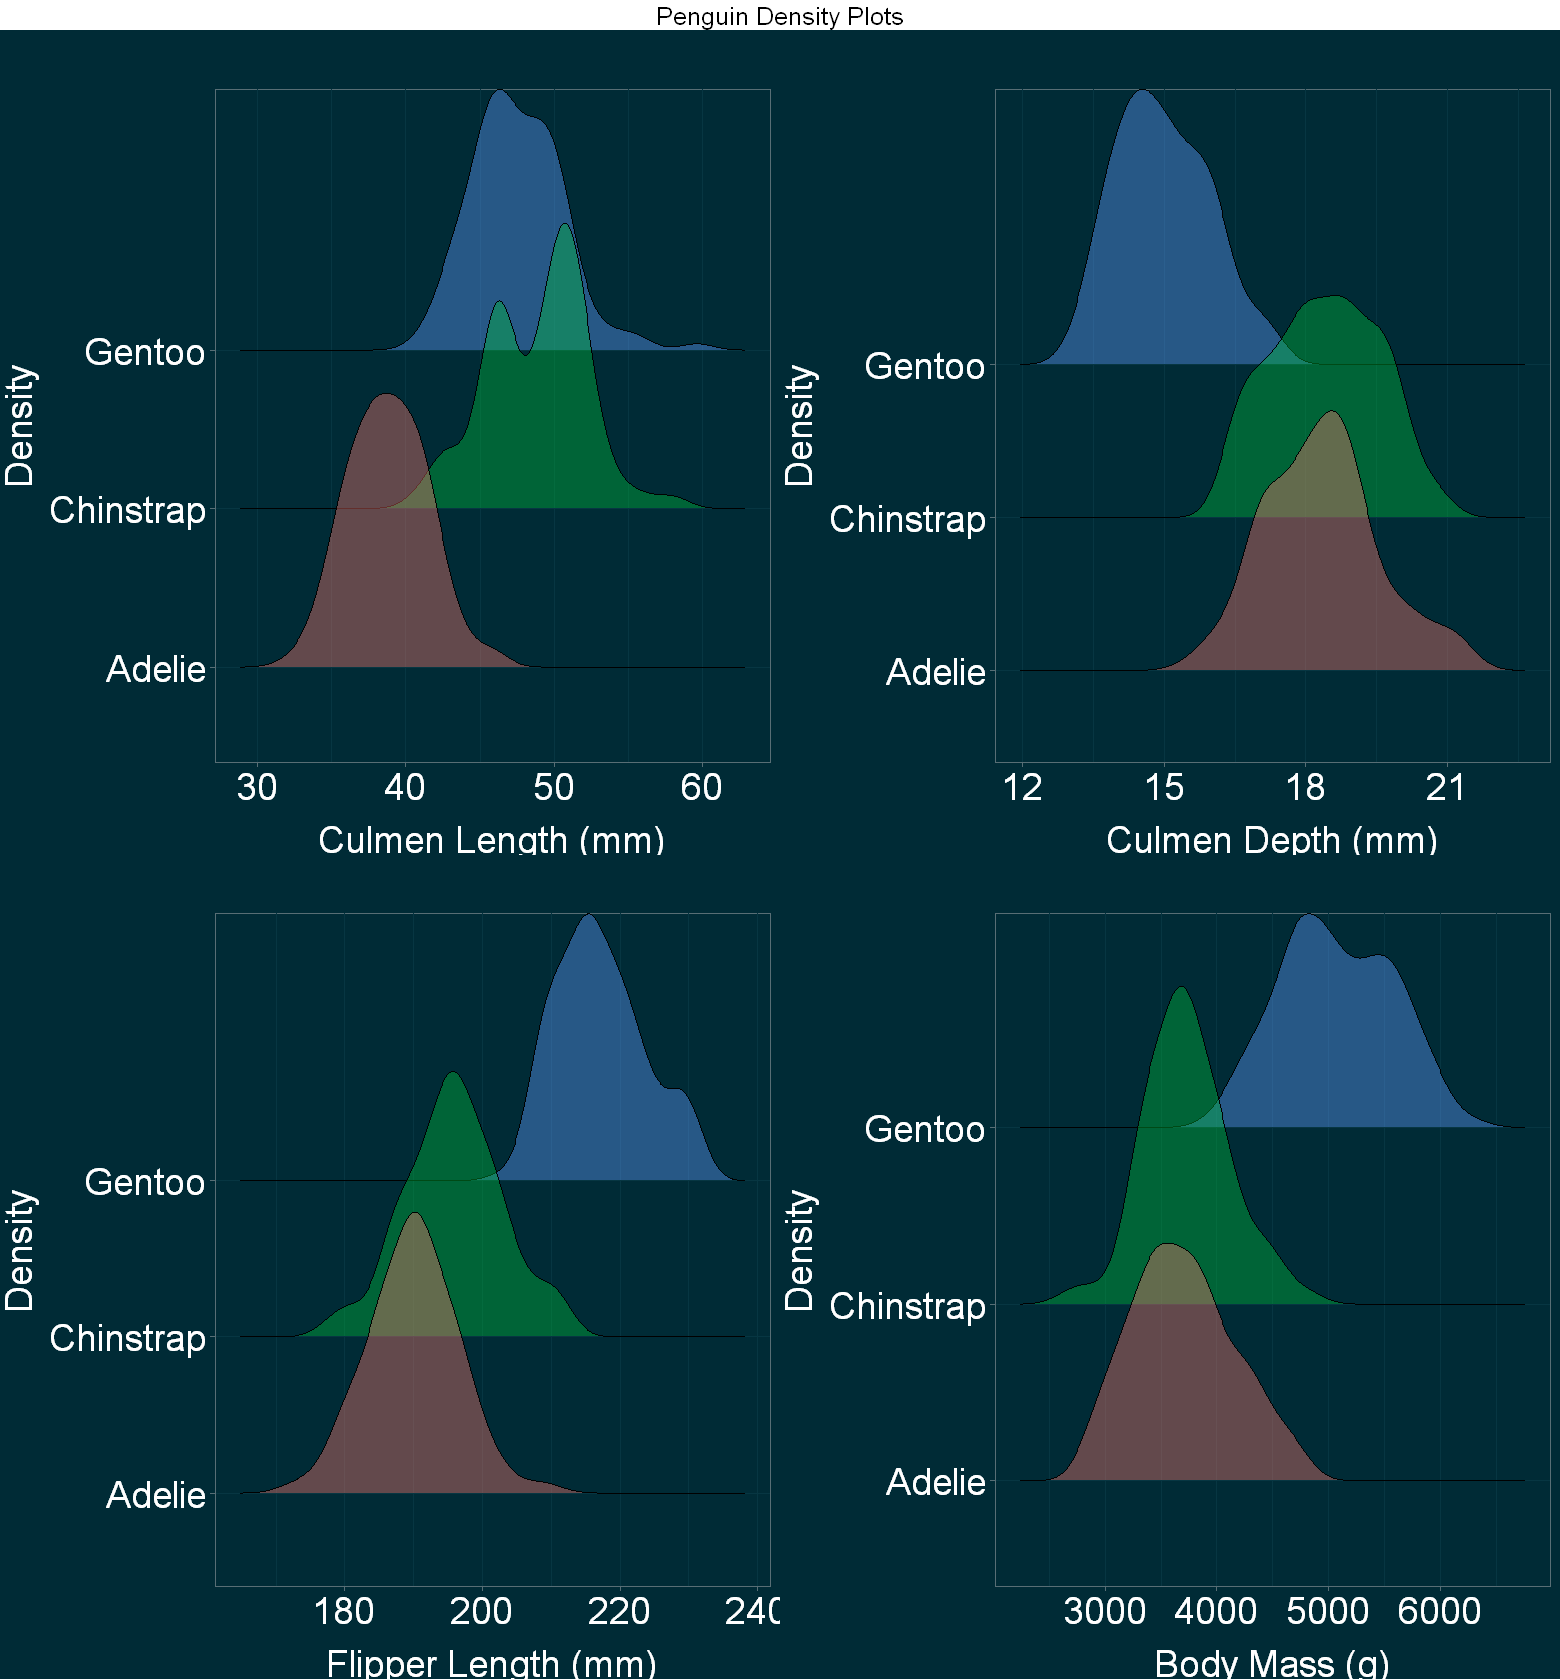

In [36]:
grid.arrange(HisCL + ggtitle(""),
             HistCD + ggtitle(""),
             HistFL + ggtitle(""),
             HistBM  + ggtitle(""),
             nrow = 2,
             top = textGrob("Penguin Density Plots", 
                            gp=gpar(fontsize=15))
)

In [18]:
options(repr.plot.width = 13, repr.plot.height = 14)

In [25]:
HisCL <- ggplot(df, aes(culmen_length_mm, species, fill = species)) +
    geom_violin(width=1) +
    geom_boxplot(width=0.07,outlier.shape = NA, color="white") +
    coord_flip() + 
    xlab("Culmen Length (mm)") +  
    ylab("Species") + 
    theme(legend.position="none")+
    ggtitle("Violin of Culmin Length")+
    geom_hline(data=df, aes(yintercept = mean(culmen_length_mm)),
             linetype="dashed",color="grey")

In [27]:
HistCD <- ggplot(df, aes(culmen_depth_mm, species, fill = species)) +
    geom_violin(width=1) +
    geom_boxplot(width=0.07,outlier.shape = NA, color="white") +
    coord_flip() + 
  xlab("Culmen Depth (mm)") +  
  ylab("Species") + 
  theme(legend.position="none")+
  ggtitle("Violin of Culmen Depth")+
  geom_hline(data=df, aes(yintercept = mean(culmen_depth_mm)),
             linetype="dashed",color="grey")

In [22]:
HistFL <- ggplot(df, aes(flipper_length_mm, species, fill = species)) + # nolint
    geom_violin(width=1) +
    geom_boxplot(width=0.07,outlier.shape = NA, color="white") +
    coord_flip() + 
  xlab("Flipper Length (mm)") +  
  ylab("Species") + 
  theme(legend.position="none")+
  ggtitle("Violin of Flipper Length")+
  geom_hline(data=df, aes(yintercept = mean(flipper_length_mm)),
             linetype="dashed",color="grey")

In [23]:
HistBM <- ggplot(df, aes(body_mass_g, species, fill = species)) +
    geom_violin(width=1) +
    geom_boxplot(width=0.07,outlier.shape = NA, color="white") +
    coord_flip() + 
  xlab("Body Mass (g)") +  
  ylab("Species") + 
  theme(legend.position="none" )+
  ggtitle("Violin of Body Mass")+
  geom_hline(data=df, aes(yintercept = mean(body_mass_g)),linetype="dashed",color="grey")

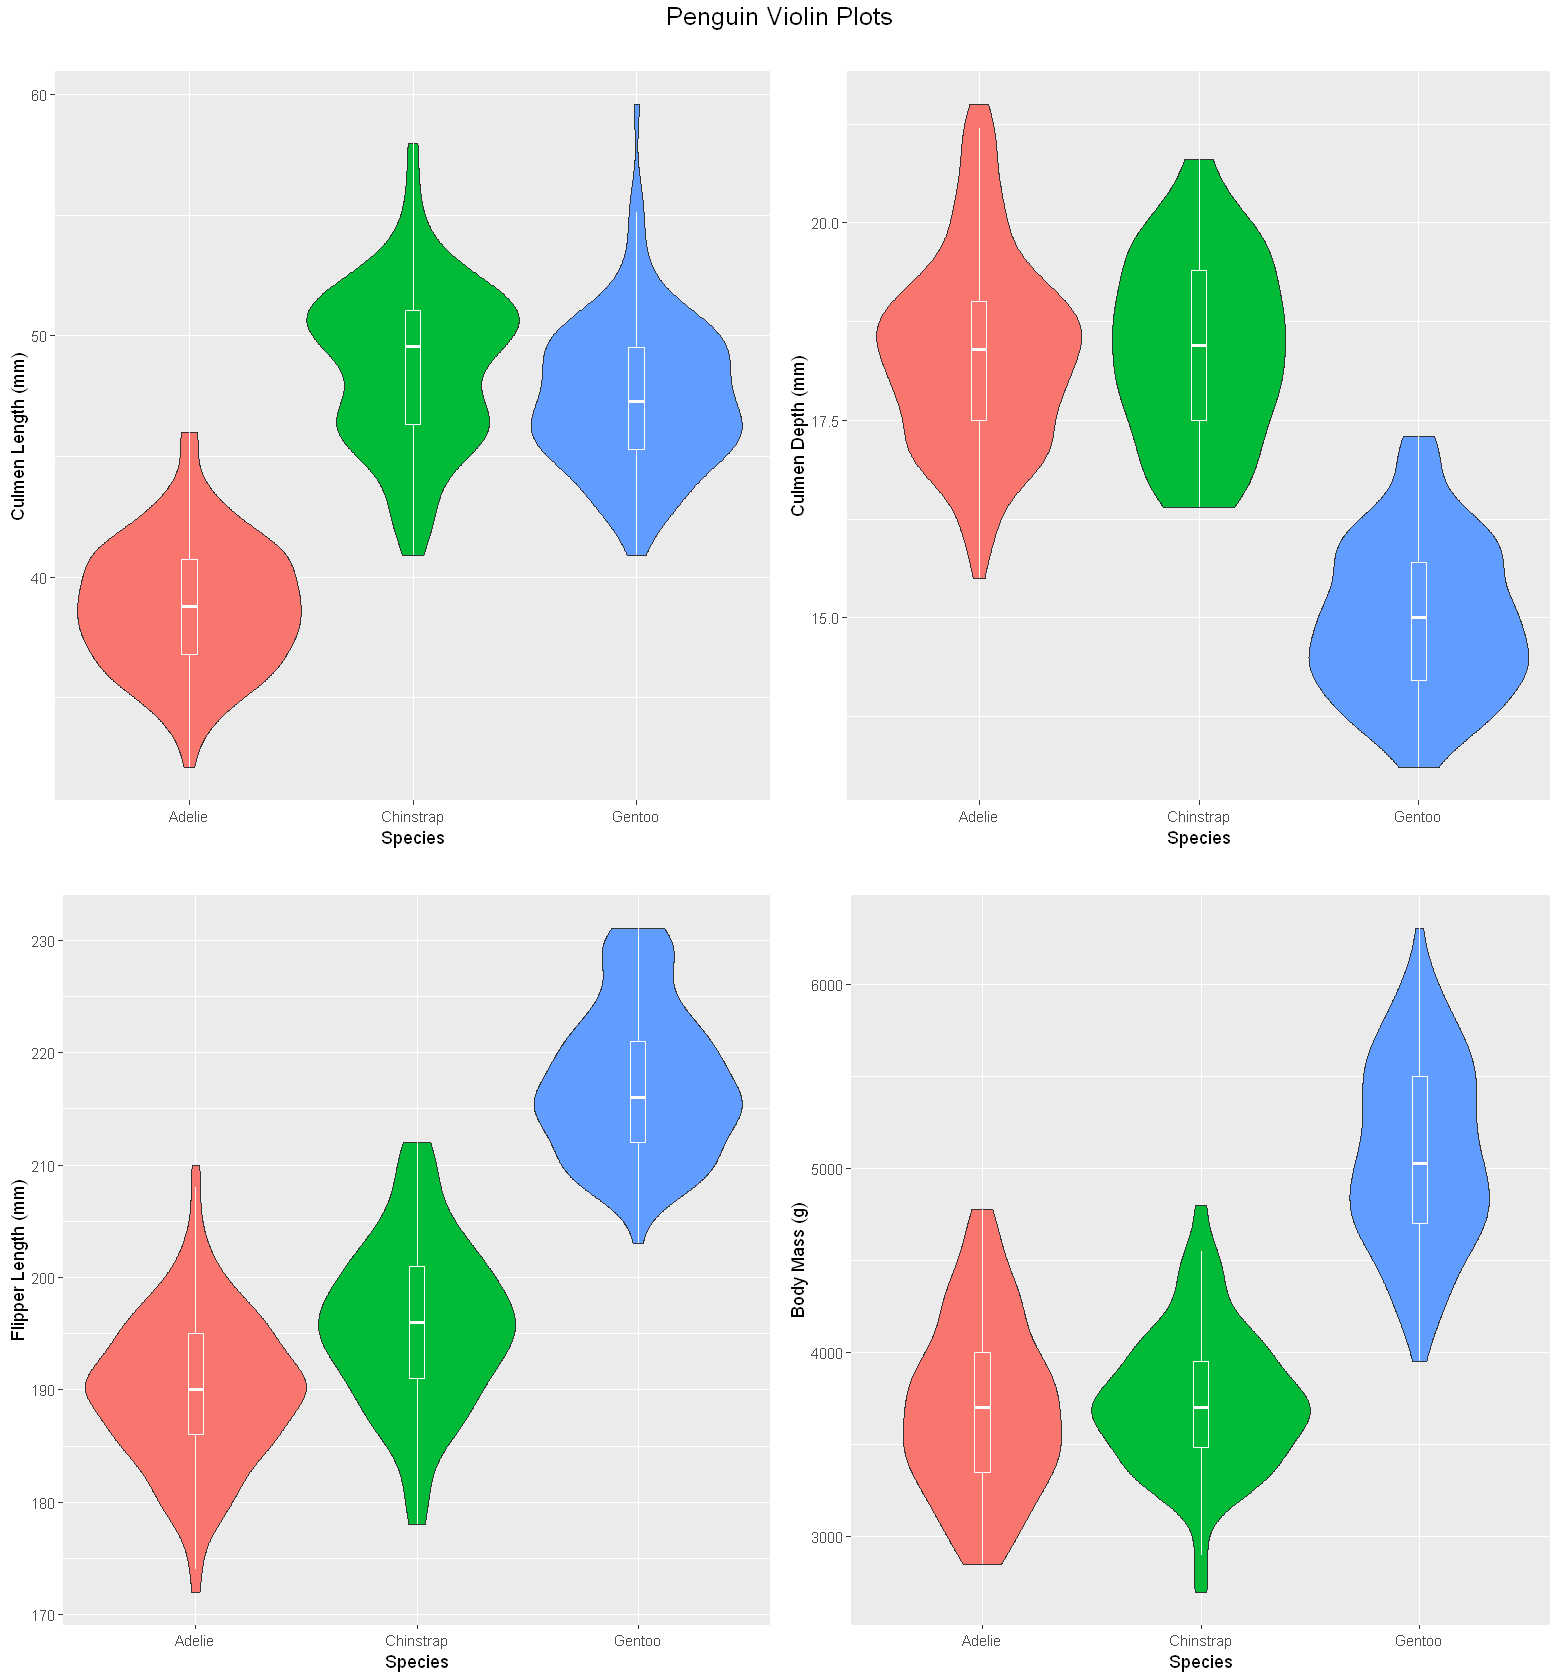

In [28]:
grid.arrange(HisCL + ggtitle(""),
             HistCD + ggtitle(""),
             HistFL + ggtitle(""),
             HistBM  + ggtitle(""),
             nrow = 2,
             top = textGrob("Penguin Violin Plots", 
                            gp=gpar(fontsize=15))
)

In [29]:
clp <- kruskal.test(culmen_length_mm ~ species, data=df)$p.value
cdp <- kruskal.test(culmen_depth_mm ~ species, data=df)$p.value
flp <- kruskal.test(flipper_length_mm ~ species, data=df)$p.value
bmp <- kruskal.test(body_mass_g ~ species, data=df)$p.value

data.frame(y=colnames(df)[3:6], x=c(clp, cdp, flp, bmp))

y,x
<chr>,<dbl>
culmen_length_mm,4.402086e-54
culmen_depth_mm,7.458847e-50
flipper_length_mm,2.942183e-54
body_mass_g,2.381292e-48


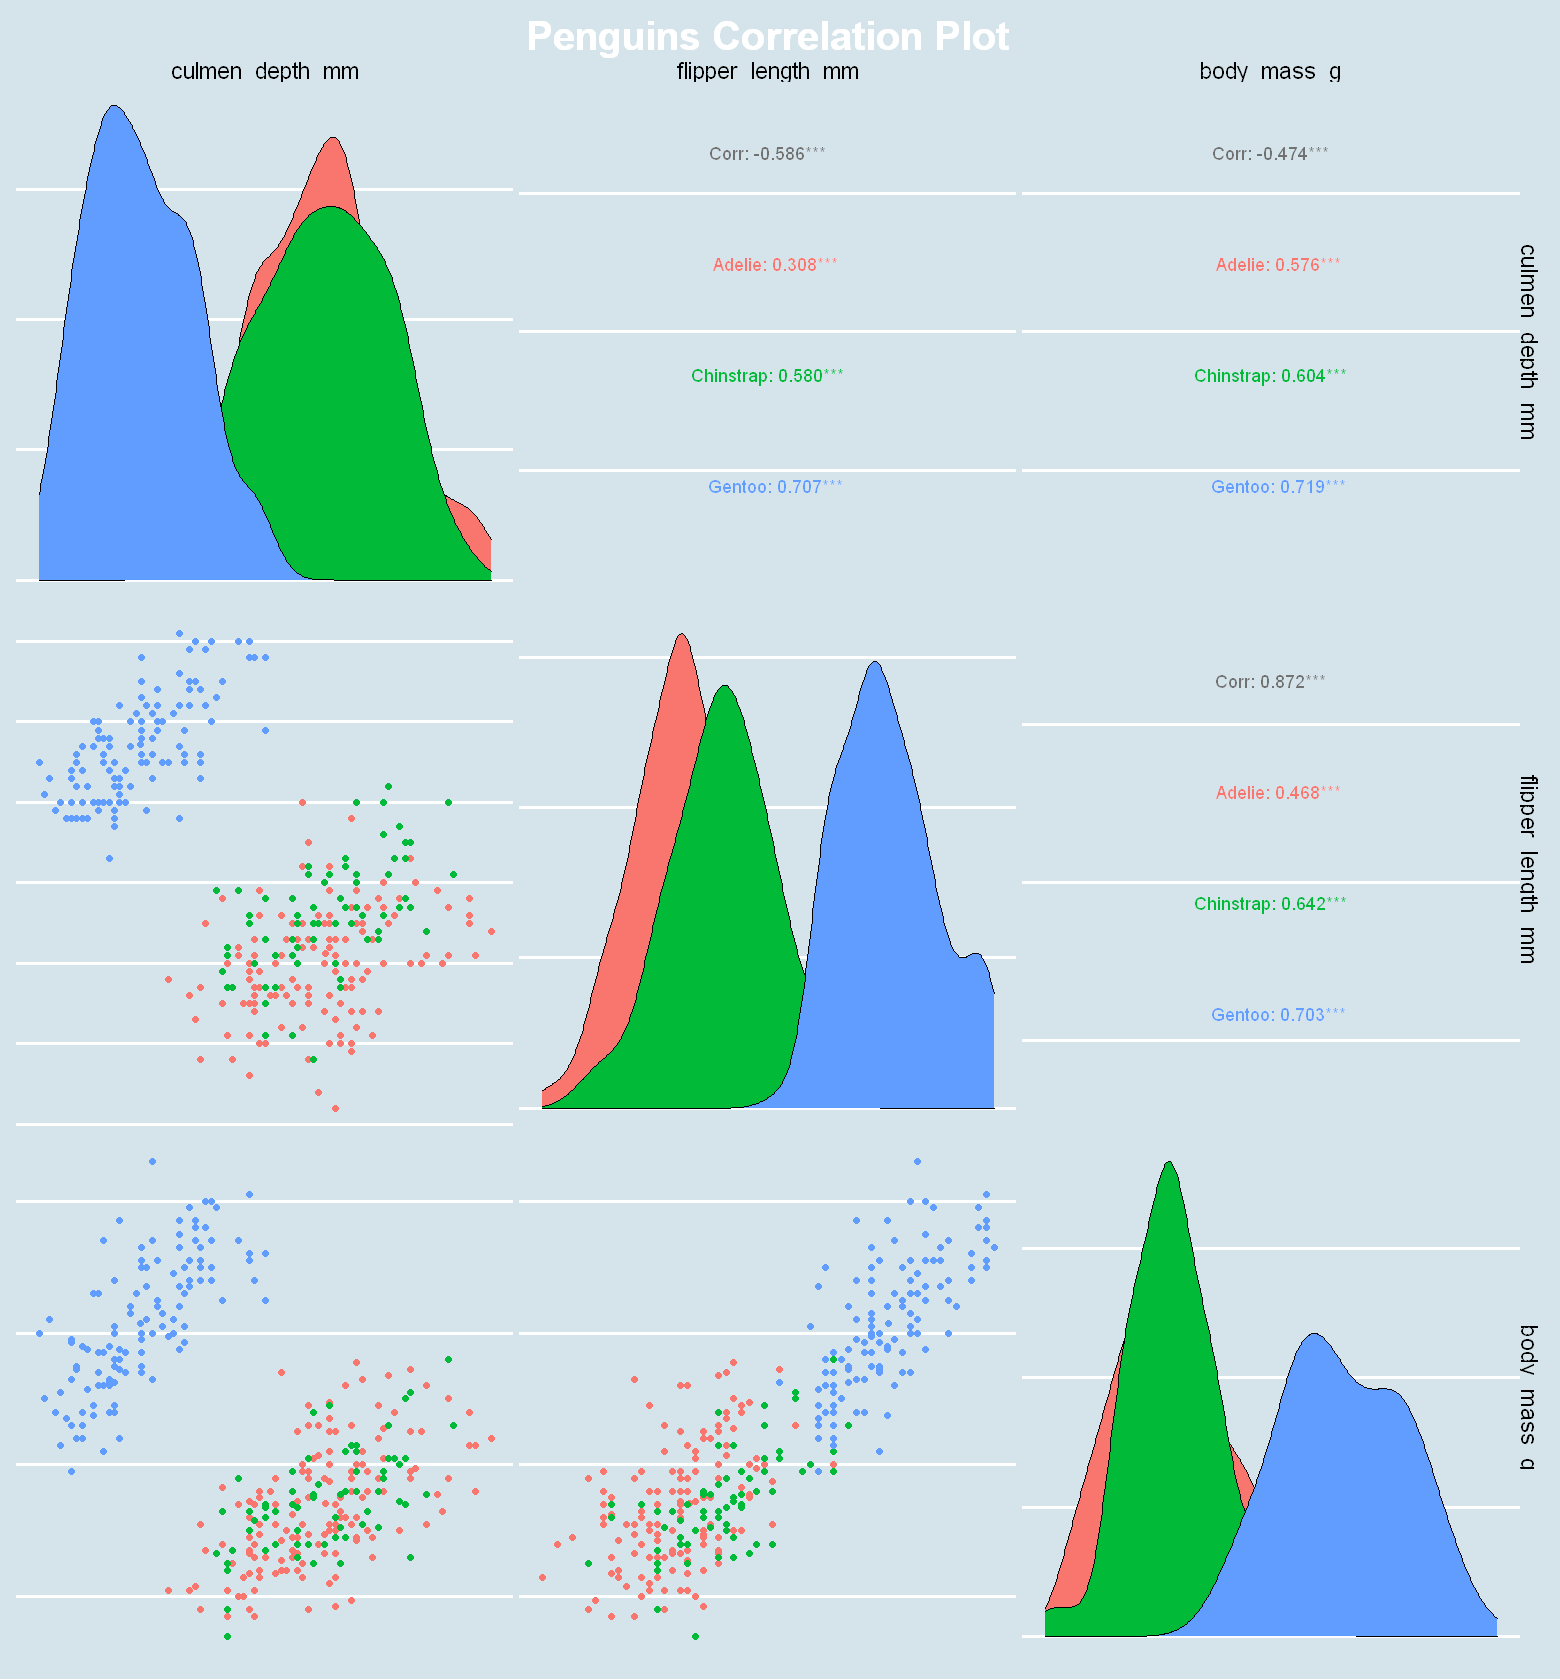

In [37]:
ggpairs(data = df,
        columns = 4:6,
        title = "Penguins Correlation Plot",
        ggplot2::aes(colour=species),
        axisLabels="none") +
    theme_economist() +
    tema

In [38]:
head(df,2)

species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Adelie,Torgersen,39.1,18.7,181,3750,MALE
Adelie,Torgersen,39.5,17.4,186,3800,FEMALE


In [39]:
df_clus <- df[,3:6]
df_clus %>%
  mutate_at(colnames(df_clus),
            ~(scale(.) %>% as.vector)) -> df_clus

head(df_clus,3)

culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
<dbl>,<dbl>,<dbl>,<dbl>
-0.8834197,0.7860414,-1.4180063,-0.5650449
-0.8100749,0.1273843,-1.0623355,-0.5026580
-0.6633851,0.4313799,-0.4221281,-1.1889134


In [ ]:
"xtable"%in% rownames(installed. packages())

In [40]:
max_num_clus <- 10
betweenss <- c()
for (n_clus in seq(2, max_num_clus)){
    cluster <- kmeans(df_clus, n_clus, nstart=30)
    betweenss <- c(betweenss, cluster$betweenss)
}

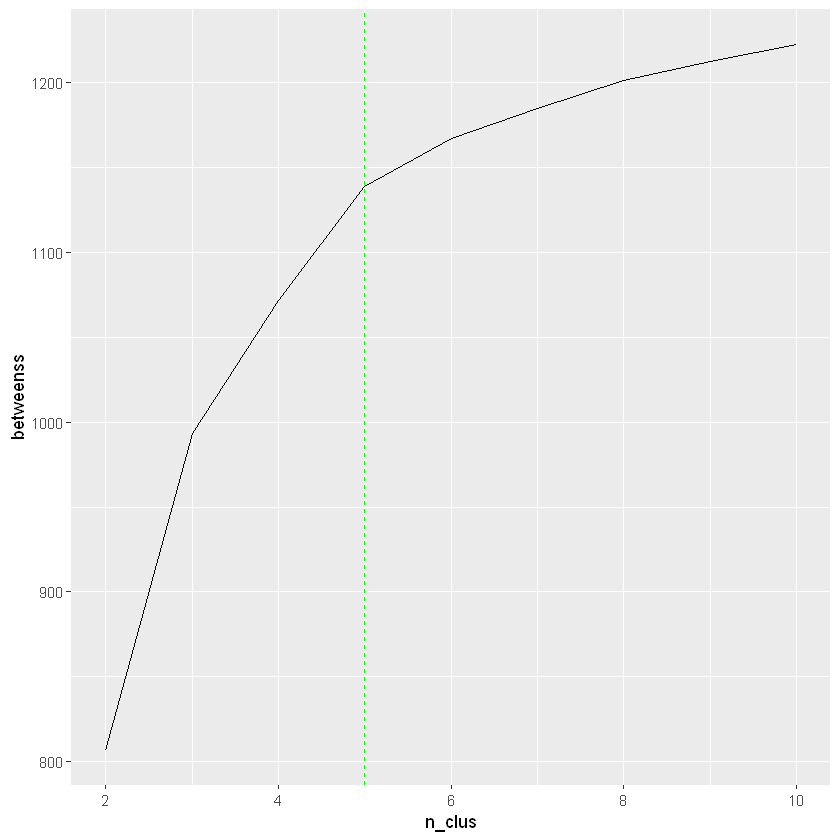

In [41]:
options(repr.plot.width = 7, repr.plot.height = 7)
data.frame(n_clus=seq(2, max_num_clus), betweenss=betweenss) %>%
    ggplot(aes(n_clus, betweenss)) + geom_line() + 
    geom_vline(aes(xintercept = 5), linetype="dashed", col="green")

In [42]:
cluster <- kmeans(df_clus, 5, nstart=30)
table(cluster$cluster, df$species)

   
    Adelie Chinstrap Gentoo
  1     60         0      0
  2      0         0     57
  3      0         0     67
  4     90         5      0
  5      2        63      0

In [43]:
df$cluster <- as.factor(cluster$cluster)

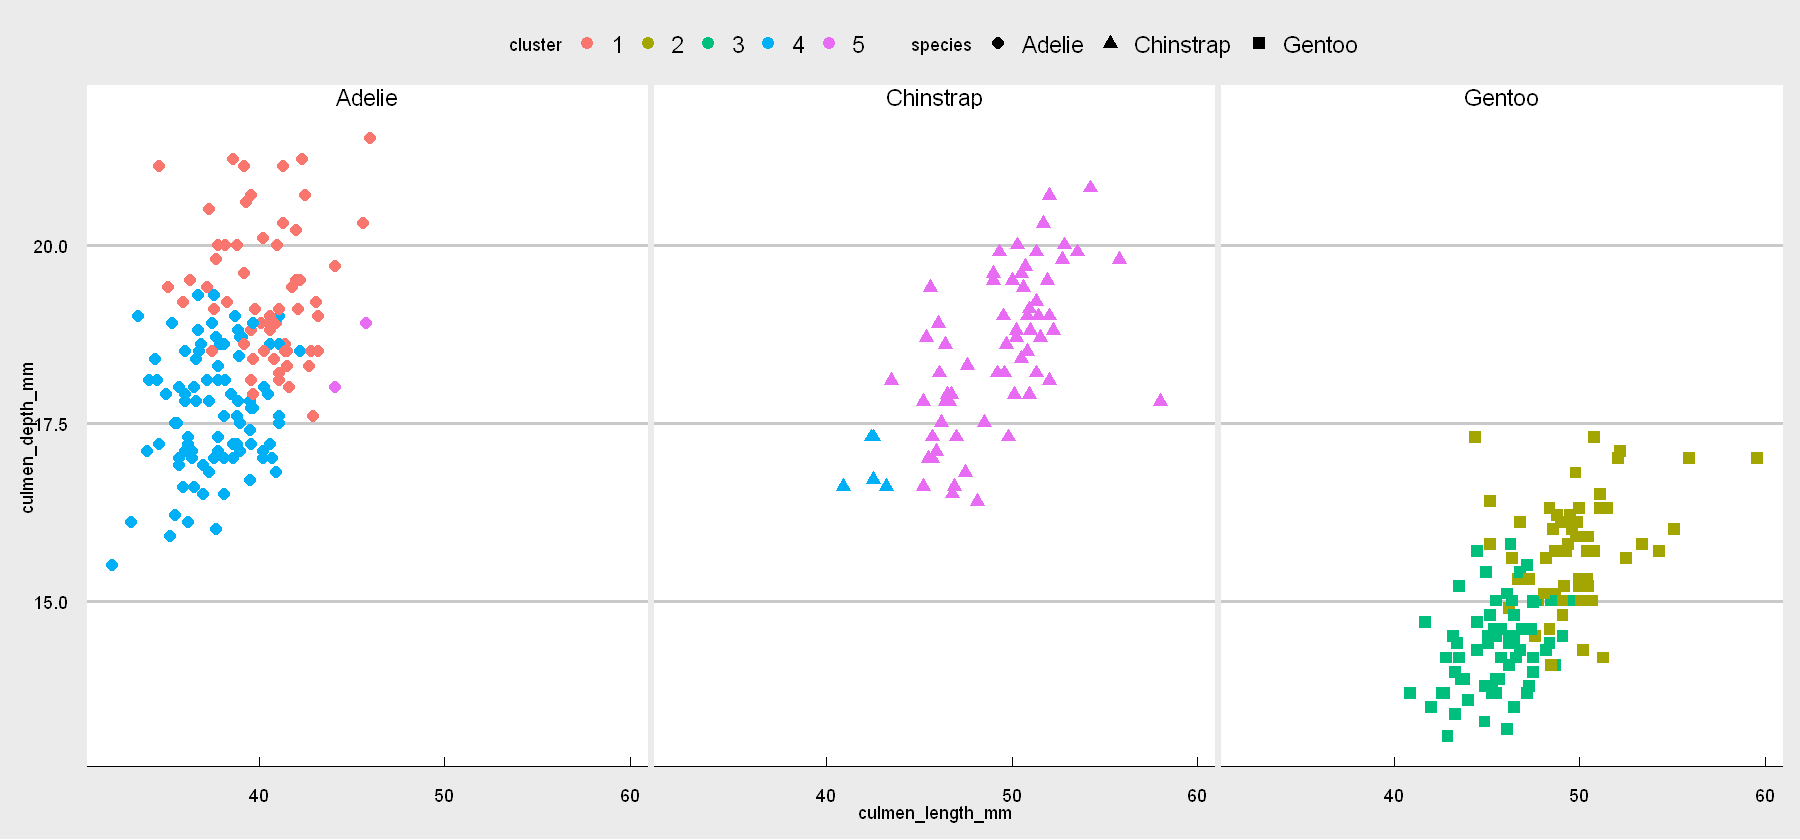

In [44]:
options(repr.plot.width = 15, repr.plot.height = 7)

ggplot(df, aes(culmen_length_mm, culmen_depth_mm)) + 
    geom_point(aes(color=cluster, shape=species), size=3) +
    facet_wrap(~ species, ncol=3) + theme_economist_white()

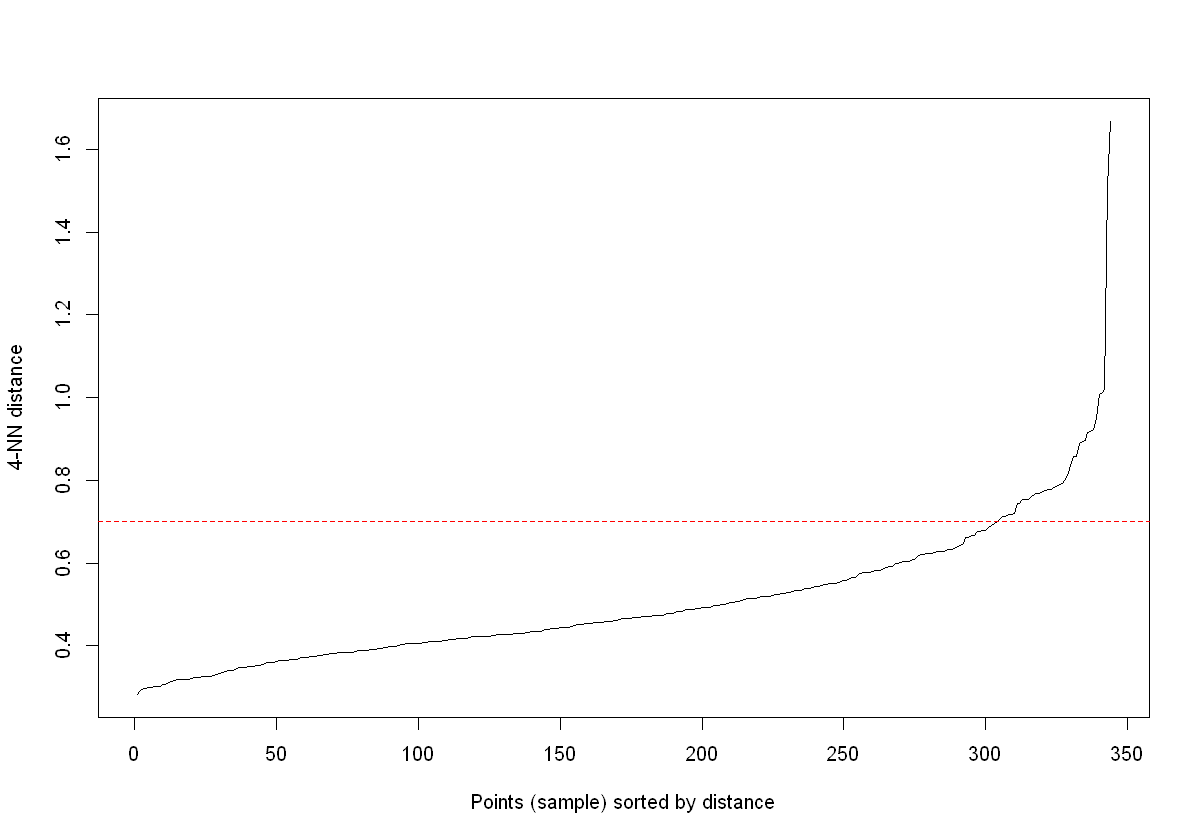

In [45]:
options(repr.plot.width = 10, repr.plot.height = 7)

dbscan::kNNdistplot(df_clus, k=4)
abline(h = 0.7, lty = 2, col = "red")

In [46]:
cluster <- dbscan::dbscan(df_clus, 0.7, minPts=12)
table(cluster$cluster, df$species)

   
    Adelie Chinstrap Gentoo
  0     11        13      4
  1    141         8      0
  2      0        47      0
  3      0         0    120

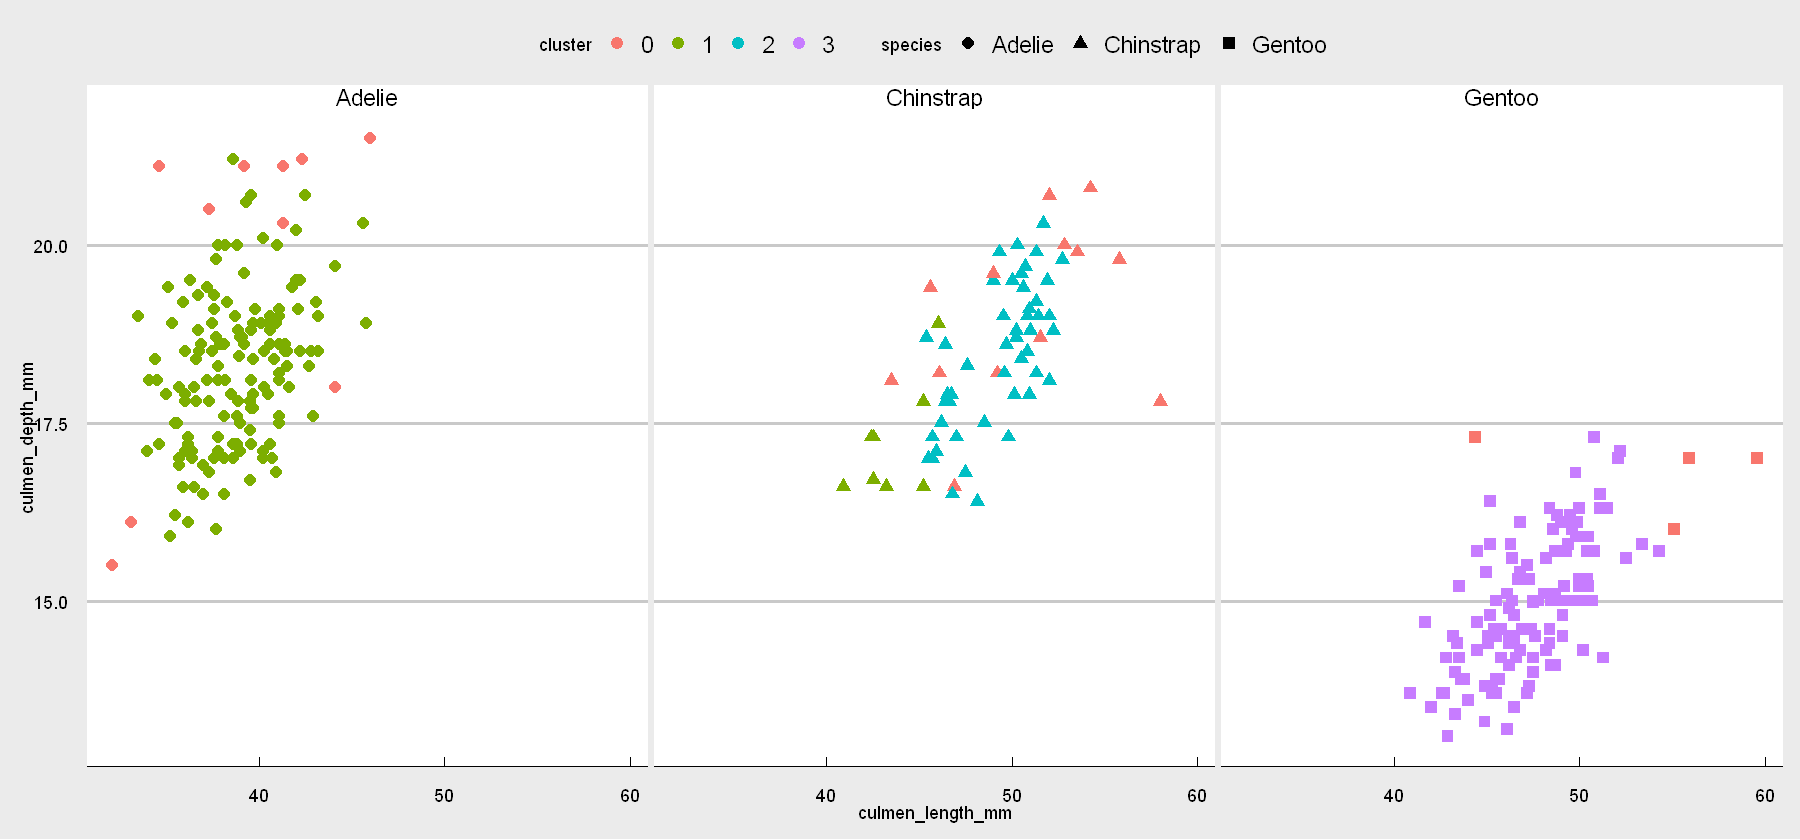

In [47]:
options(repr.plot.width = 15, repr.plot.height = 7)

df$cluster <- as.factor(cluster$cluster)

ggplot(df, aes(culmen_length_mm, culmen_depth_mm)) + 
    geom_point(aes(color=cluster, shape=species), size=3) +
    facet_wrap(~ species, ncol=3) + theme_economist_white()

In [48]:
ncluster_score <- c()
for (num_clus in seq(2, 15)){
  cluster <- factoextra::hkmeans(df_clus, num_clus)
  # Calculate silhuoette based on the mode of the cluster.
  ncluster_score <- c(ncluster_score,
                      cluster$betweenss)
}

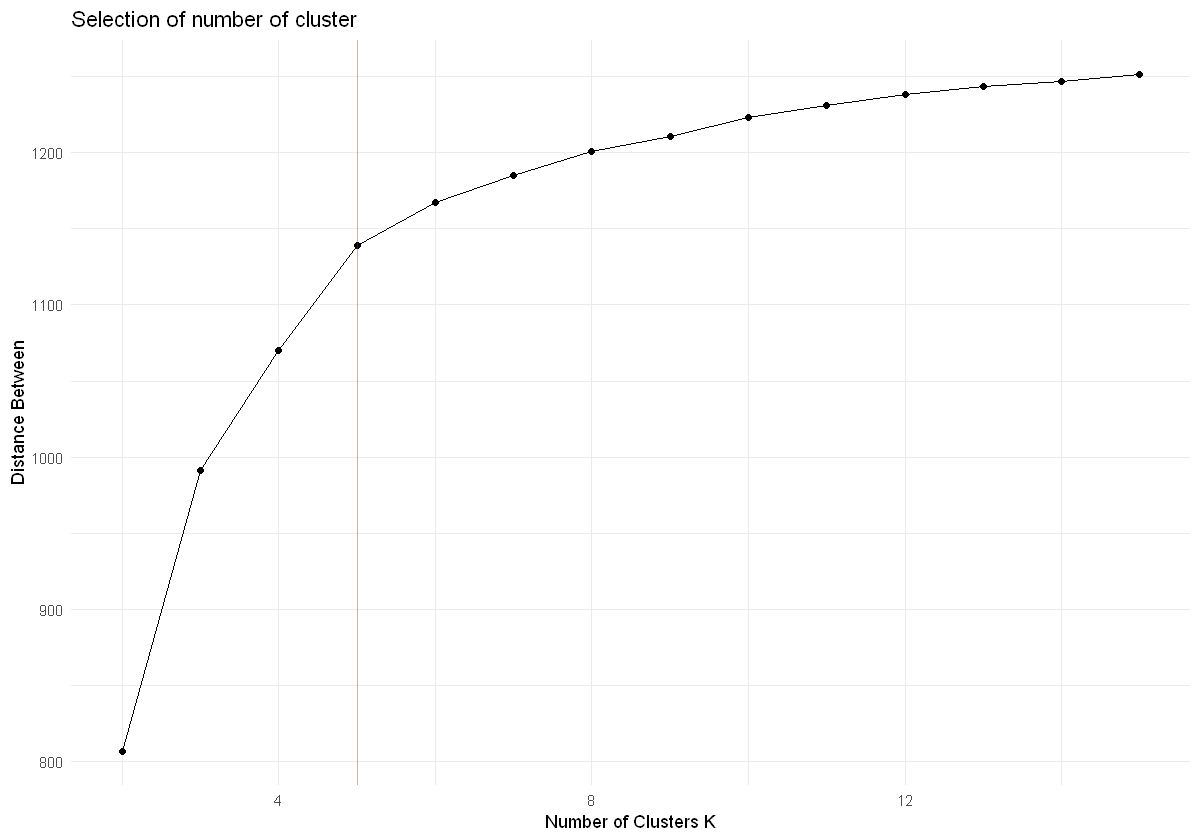

In [49]:
options(repr.plot.width = 10, repr.plot.height = 7)

data.frame(number_of_cluster = seq(2, 15),
           sil = ncluster_score) %>%
  ggplot(aes(x = number_of_cluster, y = ncluster_score)) +
  geom_line() + geom_point() +
  geom_vline(aes(xintercept = 5), color="red",
             alpha=0.4) +
  xlab("Number of Clusters K") + ylab("Distance Between") +
  ggtitle("Selection of number of cluster") +
  theme_minimal()

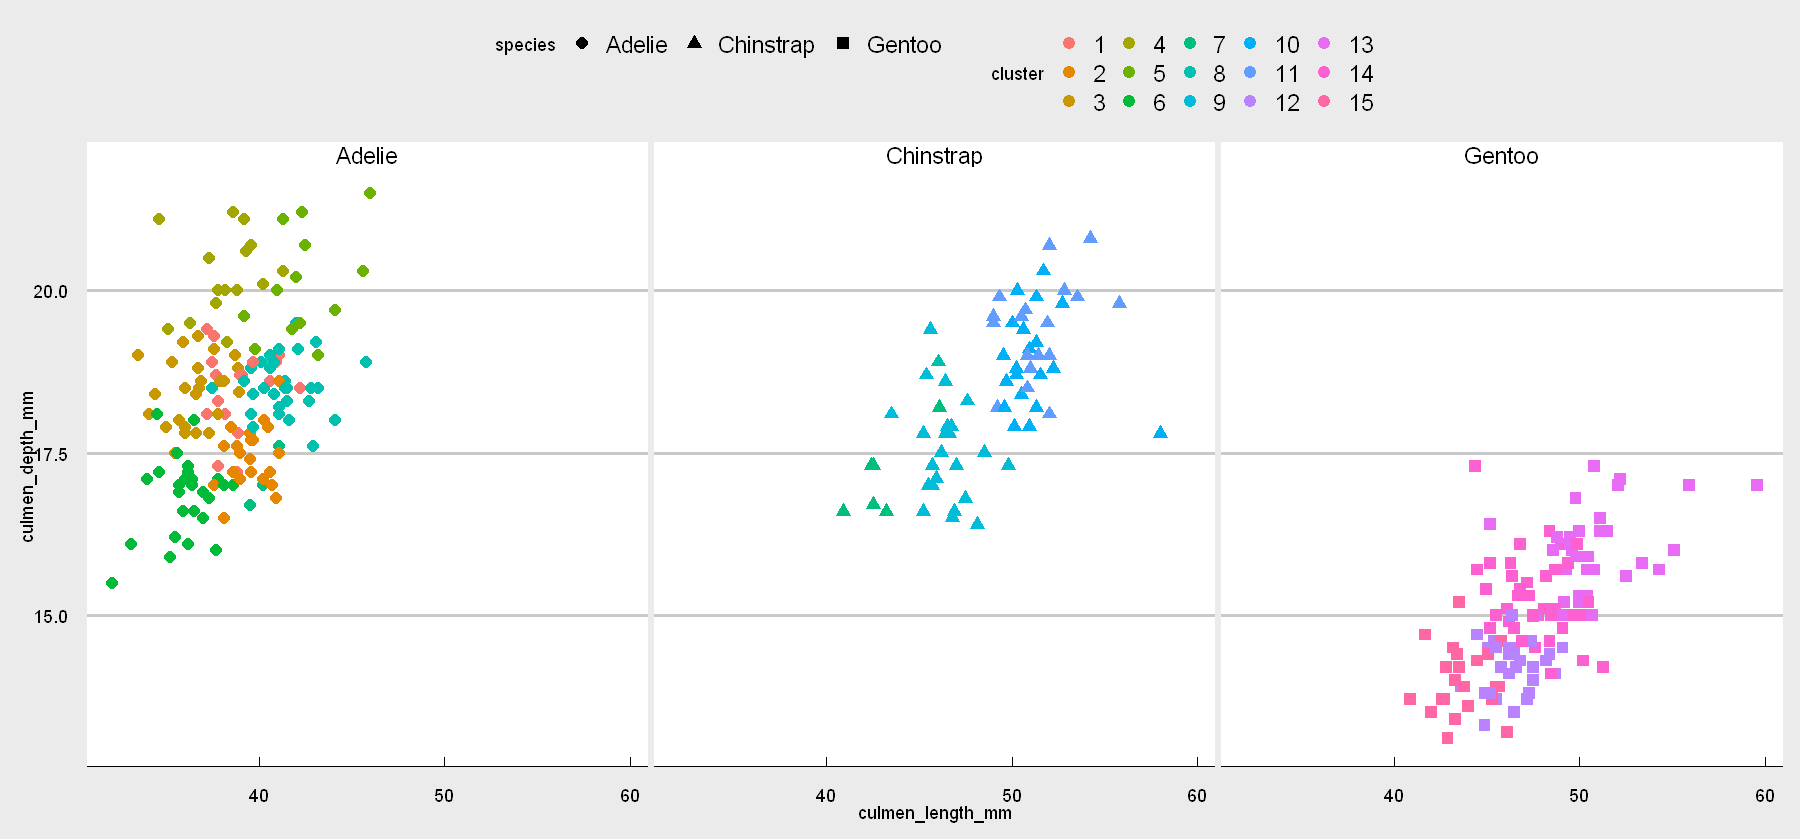

In [50]:
options(repr.plot.width = 15, repr.plot.height = 7)

df$cluster <- as.factor(cluster$cluster)

ggplot(df, aes(culmen_length_mm, culmen_depth_mm)) + 
    geom_point(aes(color=cluster, shape=species), size=3) +
    facet_wrap(~ species, ncol=3) + theme_economist_white()

In [51]:
cluster <- eclust(df_clus, "hclust") 
table(cluster$cluster, df$species)

Warning message:
"`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead."


   
    Adelie Chinstrap Gentoo
  1     98         8      0
  2     54         3      0
  3      0        57      0
  4      0         0     55
  5      0         0     69

  cluster size ave.sil.width
1       1  106          0.33
2       2   57          0.30
3       3   57          0.38
4       4   55          0.53
5       5   69          0.33


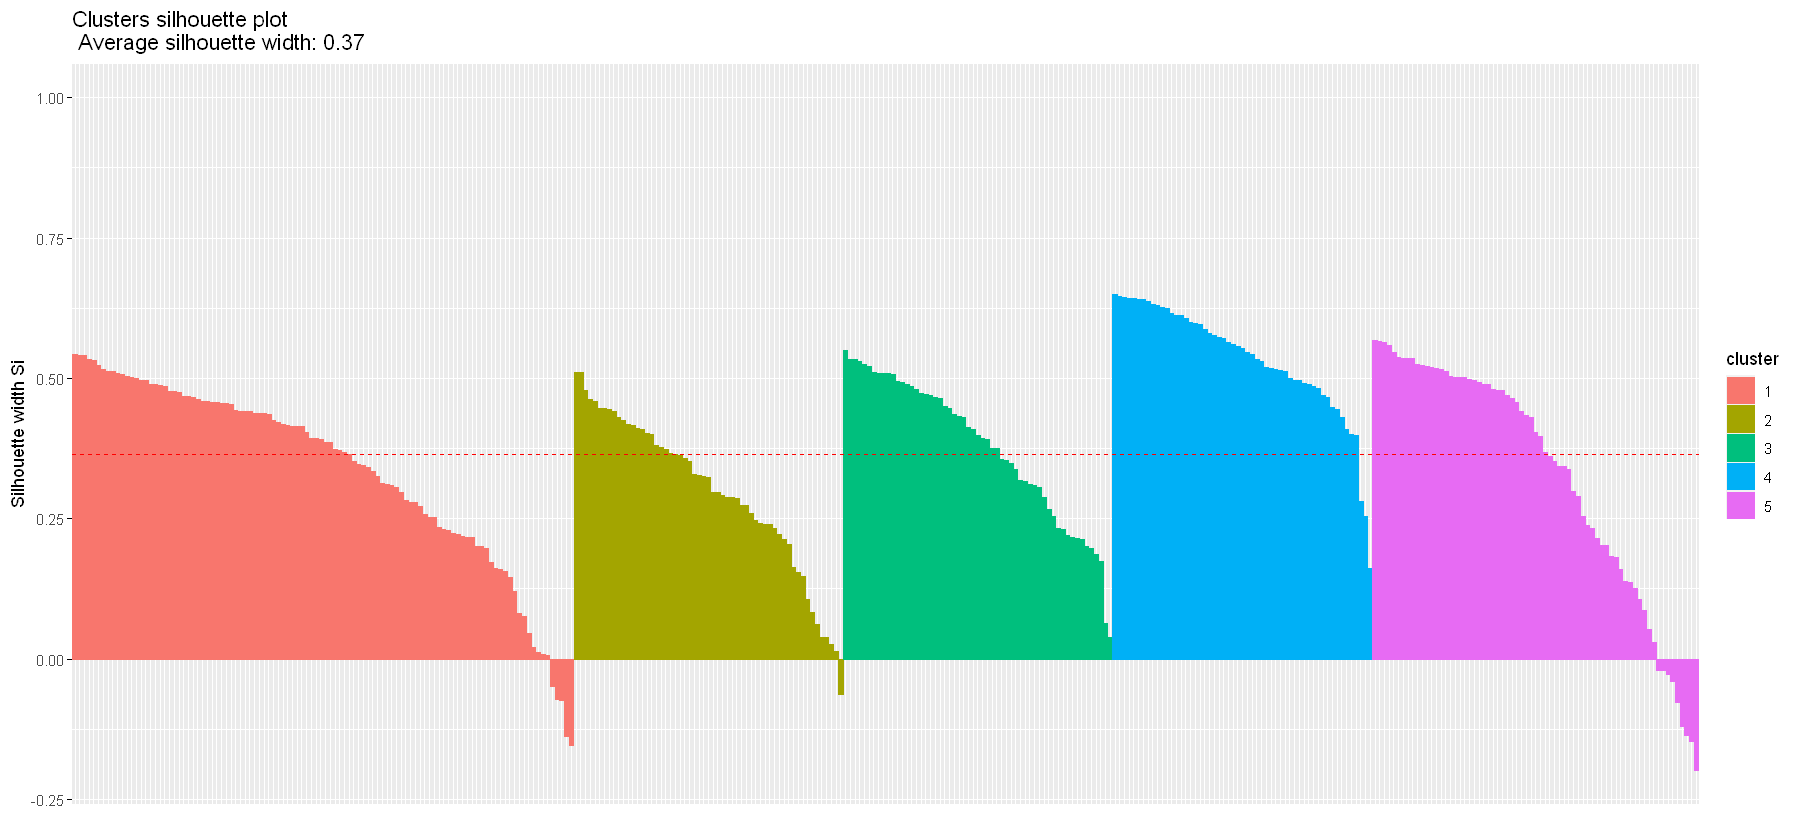

In [52]:
fviz_silhouette(cluster) # silhouette plot


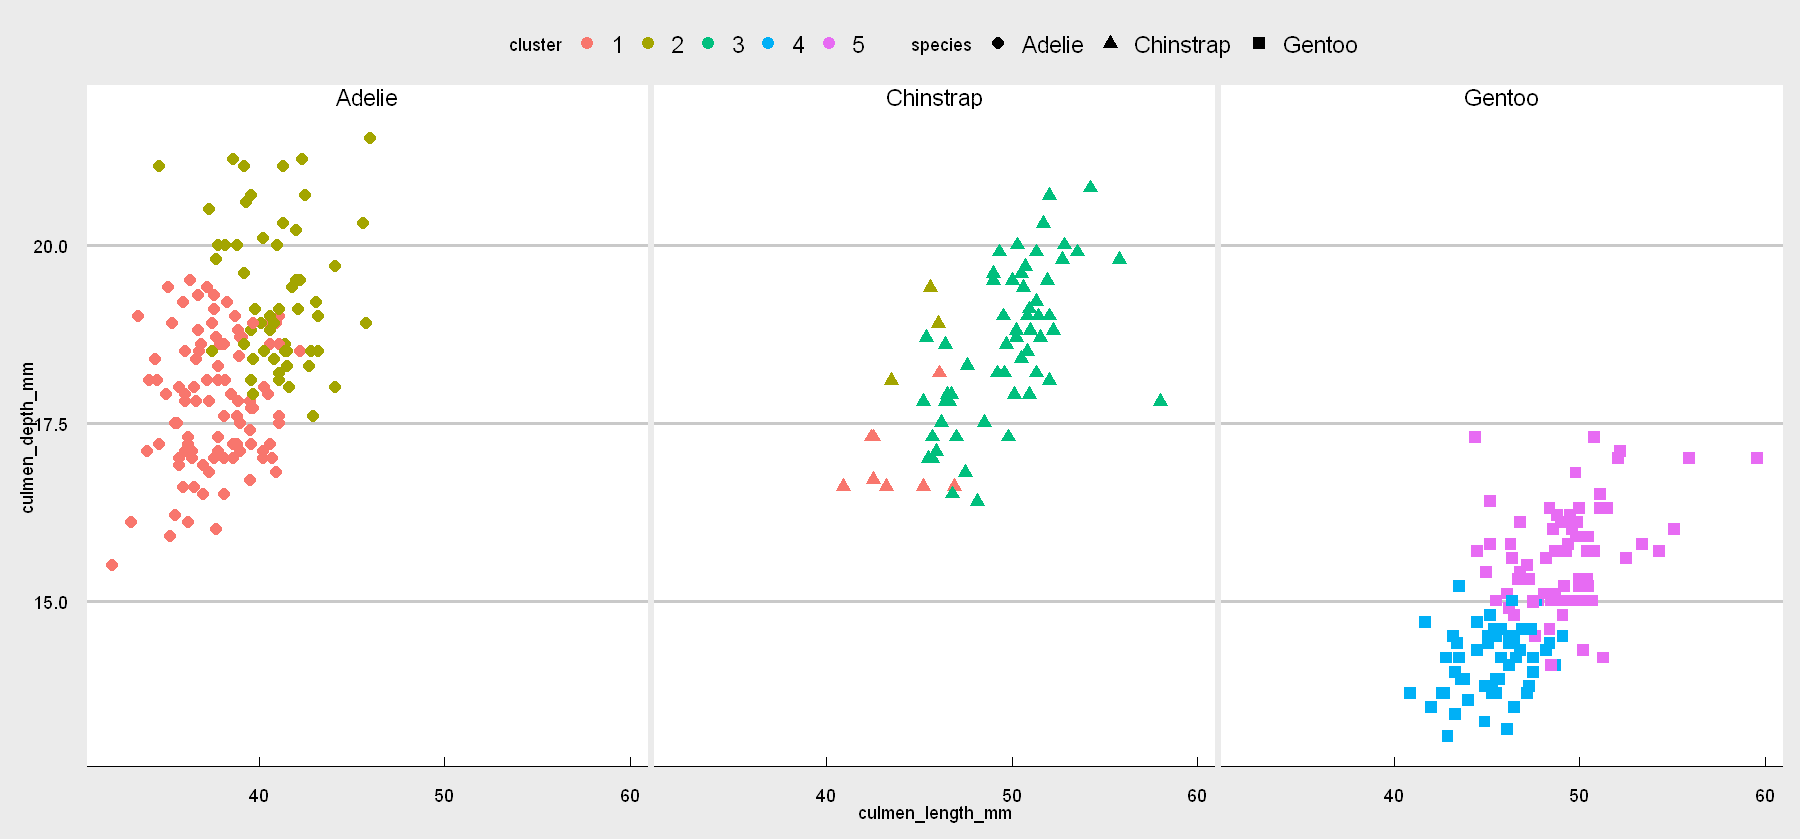

In [53]:
options(repr.plot.width = 15, repr.plot.height = 7)

df$cluster <- as.factor(cluster$cluster)

ggplot(df, aes(culmen_length_mm, culmen_depth_mm)) + 
    geom_point(aes(color=cluster, shape=species), size=3) +
    facet_wrap(~ species, ncol=3) + theme_economist_white()

In [54]:
cluster <- pam(df_clus, 5)
table(cluster$cluster, df$species)

   
    Adelie Chinstrap Gentoo
  1     93         7      0
  2     59         5      0
  3      0        56      0
  4      0         0     72
  5      0         0     52

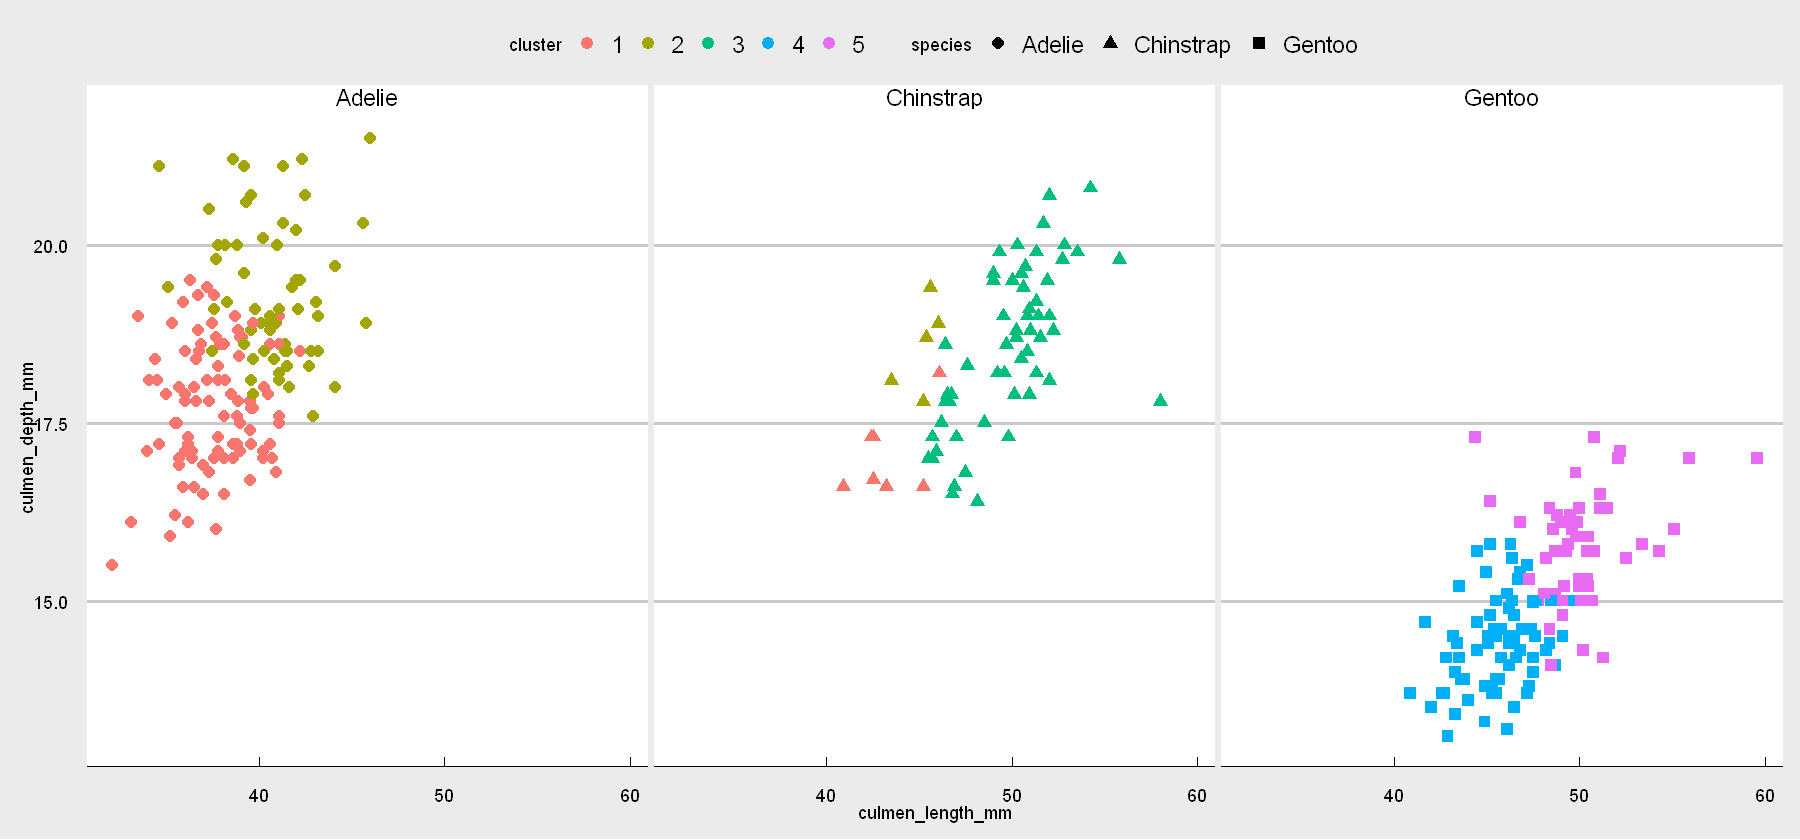

In [55]:
options(repr.plot.width = 15, repr.plot.height = 7)

df$cluster <- as.factor(cluster$cluster)

ggplot(df, aes(culmen_length_mm, culmen_depth_mm)) + 
    geom_point(aes(color=cluster, shape=species), size=3) +
    facet_wrap(~ species, ncol=3) + theme_economist_white()